# Census Income Analysis

In [1]:
# Import the necessasry libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from collections import Counter

In [3]:
# Load the Census dataset and change column names

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary_detail'])

In [5]:
# Display the dataset

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_detail
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Fetch basic information about the dataset attributes

In [7]:
# Create data dictionary giving description of columns in the dataset

Attribute Information: 

Details of attribues in data set are described below:
1. Age: Describes the age of individuals. Variable Type : Continuous
2. Workclass: Describes type of employment of individuals. Variable Type: Categorical
3. fnlwgt: Final weight on Current Population Survey. Variable Type :Continuous.
4. education: Describes type of education of individuals. Variable Type: Categorical
5. education-num: Number of years spent in education. Variable Type: Continuous.
6. marital-status: Describes marital status of individuals. Variable Type: Categorical
7. occupation: Describes occupation type of individuals. Variable Type: Categorical
8. relationship: Describes relationship of individuals to other members. Variable Type: Categorical
9. race: Race of the individual.  Variable Type: Categorical
10. sex: Gender of the individual. Variable Type: Categorical
11. capital-gain: Capital gain details of the individual. Variable Type: Continuous.
12. capital-loss: Capital loss details of the individual. Variable Type: Continuous.
13. hours-per-week: Hours worked per week. Variable Type: Continuous.
14. native-country: Native country of the individual. Variable Type: Categorical
15. salary_detail: Target class indicating salary >50K or  <=50K

In [8]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
print(categorical_features)
numerical_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(numerical_features)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary_detail']
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [9]:
# Fetch basic information about the dataset attributes

In [10]:
print('Shape of Entire Dataframe:',df.shape)

Shape of Entire Dataframe: (32561, 15)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary_detail   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
for i in range (0, df.shape[1]):
    print("Data type of feature/column ", df.columns[i]," is: ",type(df.iloc[1,i]))

Data type of feature/column  age  is:  <class 'numpy.int64'>
Data type of feature/column  workclass  is:  <class 'str'>
Data type of feature/column  fnlwgt  is:  <class 'numpy.int64'>
Data type of feature/column  education  is:  <class 'str'>
Data type of feature/column  education-num  is:  <class 'numpy.int64'>
Data type of feature/column  marital-status  is:  <class 'str'>
Data type of feature/column  occupation  is:  <class 'str'>
Data type of feature/column  relationship  is:  <class 'str'>
Data type of feature/column  race  is:  <class 'str'>
Data type of feature/column  sex  is:  <class 'str'>
Data type of feature/column  capital-gain  is:  <class 'numpy.int64'>
Data type of feature/column  capital-loss  is:  <class 'numpy.int64'>
Data type of feature/column  hours-per-week  is:  <class 'numpy.int64'>
Data type of feature/column  native-country  is:  <class 'str'>
Data type of feature/column  salary_detail  is:  <class 'str'>


In [13]:
# Describe the continuous features of dataset

In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Exploratory Data Analysis

In [15]:
# Data Cleanup - Check for missing values

In [16]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


In [17]:
# Data Cleanup - Check for duplicate values

In [18]:
# Data cleanup - Check for missing Values per Column in the dataframe

In [19]:
for i in df.columns:
  print(pd.DataFrame({'value' : df[i], 'Missing?' : df[i].isnull()})) 

       value  Missing?
0         39     False
1         50     False
2         38     False
3         53     False
4         28     False
...      ...       ...
32556     27     False
32557     40     False
32558     58     False
32559     22     False
32560     52     False

[32561 rows x 2 columns]
                   value  Missing?
0              State-gov     False
1       Self-emp-not-inc     False
2                Private     False
3                Private     False
4                Private     False
...                  ...       ...
32556            Private     False
32557            Private     False
32558            Private     False
32559            Private     False
32560       Self-emp-inc     False

[32561 rows x 2 columns]
        value  Missing?
0       77516     False
1       83311     False
2      215646     False
3      234721     False
4      338409     False
...       ...       ...
32556  257302     False
32557  154374     False
32558  151910     False
32559  20149

In [20]:
# Removing target variable from dataset duplicate.

In [21]:
df1 = df.copy()
y=df['salary_detail'].to_numpy()
del df1['salary_detail']
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [22]:
# Univariate Analysis for different categorical and continuous columns

In [23]:
#df[categorical_features[0]].value_counts().plot.bar()
for i in range(len(categorical_features)):
    print("Feature Name:",categorical_features[i])
    print("Attribute Details:")
    print(df[categorical_features[i]].value_counts())
    print()

Feature Name: workclass
Attribute Details:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Feature Name: education
Attribute Details:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Feature Name: marital-status
Attribute Details:
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 

In [24]:
# Scaling?

Gathering insights from the data by graphically exploring different attributes from the dataset

In [25]:
# Bivariate analysis

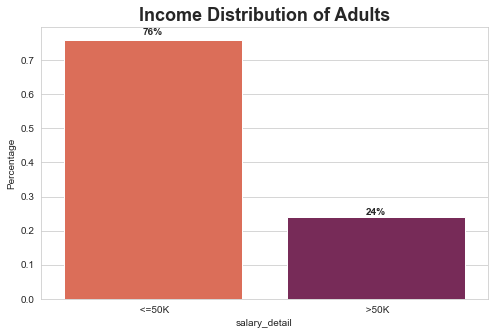

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['salary_detail'].value_counts(normalize = True).rename_axis('salary_detail').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'salary_detail', y = 'Percentage', data = eda_percentage.head(10), palette='rocket_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [27]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


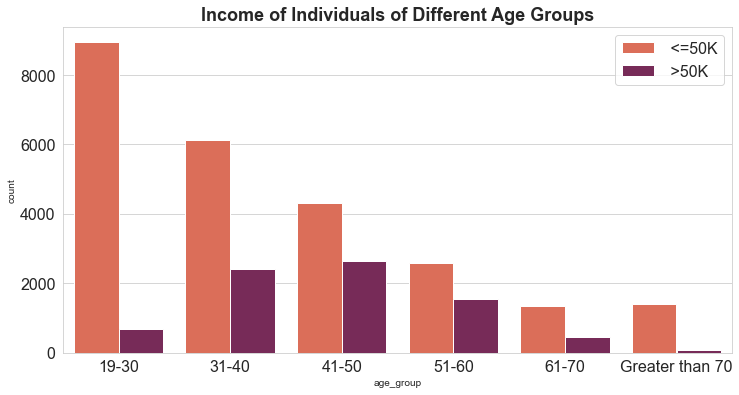

In [28]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['salary_detail'], palette='rocket_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


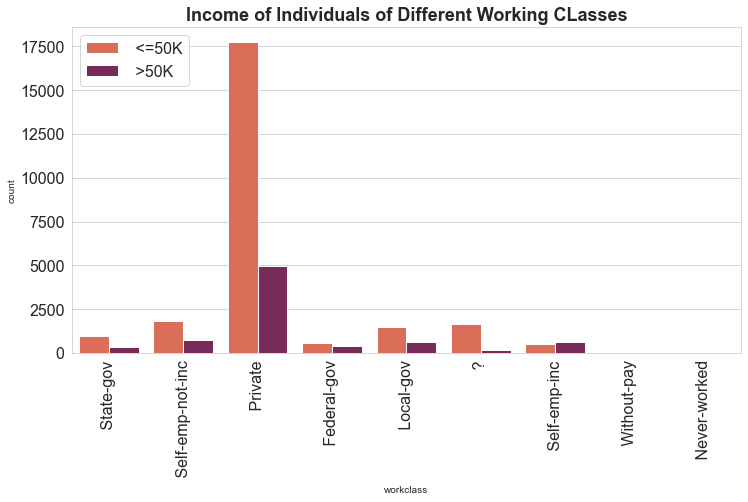

In [29]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['salary_detail'], palette='rocket_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


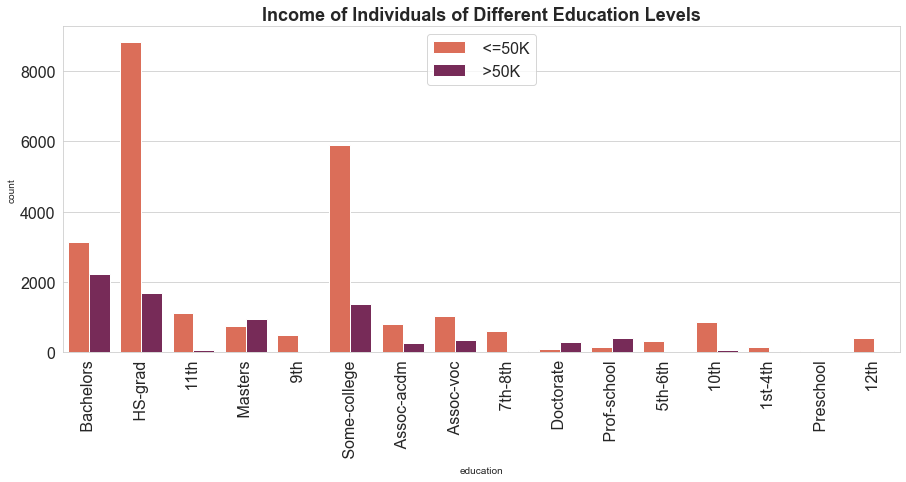

In [30]:
plt.figure(figsize=(15,6))
# #order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
#                 'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
#               'Assoc-acdm', 'Assoc-voc']
sns.countplot(df['education'], hue = df['salary_detail'], palette='rocket_r')
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


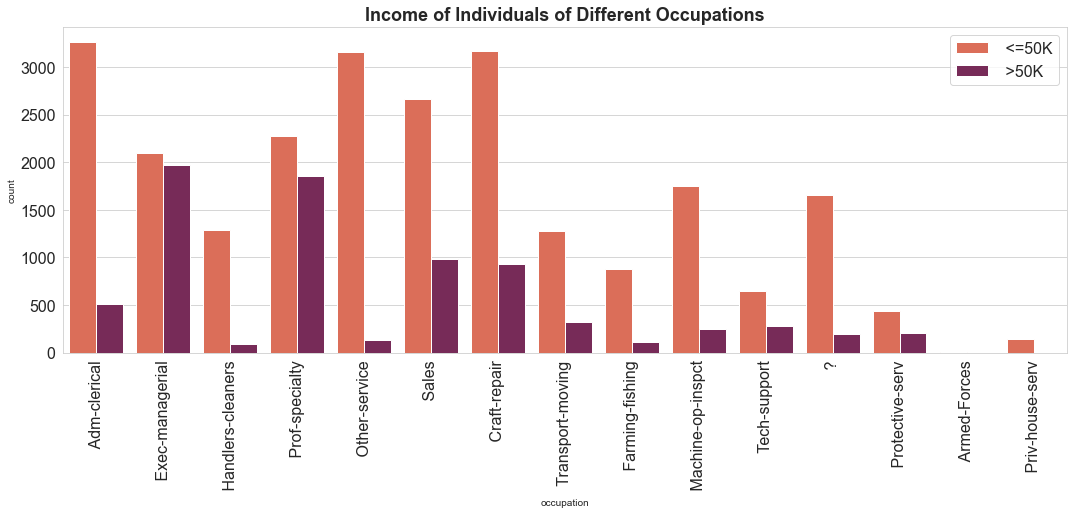

In [34]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['occupation'], hue = df['salary_detail'], palette='rocket_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [32]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_detail,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,31-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,19-30
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,31-40
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,51-60
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,19-30


In [ ]:
def encoding(x_train,x_test,columns_to_encode,encoder,name):
  for i in columns_to_encode:
    x_train[i]=encoder.fit_transform(x_train[i].values.reshape(-1,1))
    x_test[i]=encoder.transform(x_test[i].values.reshape(-1,1))
    # path='/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/Cleaning Encoders/'
    # with open(path+str(name)+'_'+str(i),'wb') as f:
    #   pickle.dump(encoder,f)
  return x_train,x_test

In [ ]:
columns_to_label_encode=['Countries', 'Industry Sector','Genre','Employee or Third Party']
columns_to_ordinal_encode=['Potential Accident Level']
columns_to_binary_encode=['Local']